# Fourier transforms 

This notebook aims at experimenting the Fourier Transform in python and understand the output of several methods of the FFT module. 

In the following, you will look at the Fourier transform of several typical signals and use a FT to filter frequencies in a multi-frequency signal. 

You have experimented with the analysis of gravitational waves using FFT. Many other applications exists in physics and astrophysics. Fourier transform are used for searching frequencies in time series (asteroseismology, variable stars, pulsars, search for transiting exoplanets, audio signal processing, seismology, ...), for "denoising" (removal of 'low'/'high' frequency signal). They are also a key component of image reconstruction in optical nad radio interferometry. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from importlib.metadata import version  # not with recent python distrib 
import sys
from numpy.fft import fft, fftfreq
# Alternative with scipy 
#from scipy.fftpack import fft, rfft
#from scipy.fftpack import fftfreq, rfftfreq

#print('numpy : v',version('numpy'))
#print('matplotlib : v',version('matplotlib'))
#print('python : v',sys.version[:7])

print('numpy : v', np.__version__)
print('matplotlib : v', matplotlib.__version__)
print('python : v', sys.version[:7])

numpy : v 1.21.4
matplotlib : v 3.1.2
python : v 3.7.12 


## TF of a sinus 

Let's work with the function sinus(9 * t). This function makes a full cylce in $2\pi/9.$ = 0.698 s. 

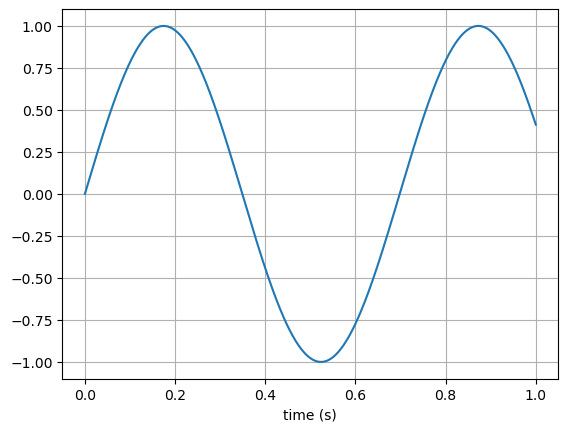

In [2]:
# Let's take a sinus function and visualise its variation over a time range of 1s
t_oversampled = np.linspace(0,1,1000) 
true_signal = np.sin(9 * t_oversampled)
plt.plot(t_oversampled, true_signal)
plt.xlabel('time (s)')
plt.grid(True)

[56.1068813] 6.283185307179586


Text(0.5, 0, 'time (s)')

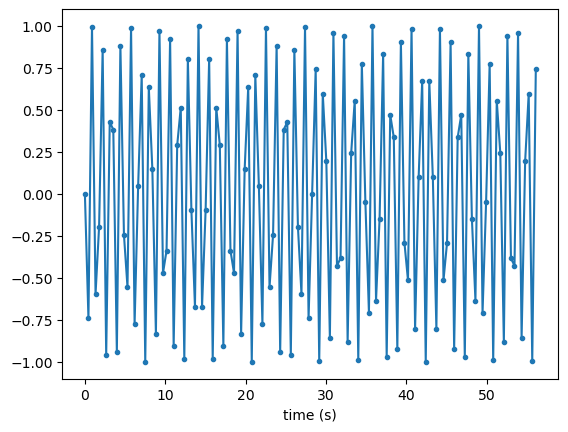

In [3]:
# Let's now work with a signal for which this function is sampled 128 times over a duration [0, 18\pi]
t = np.linspace(-0.0, 18*np.pi, 128, endpoint=False) 
# endpoint needs to be false because fft consider the signal to be periodic
# If not False, the repetion of the signal creates an artefact in the TF (see below)
# An alternative is to use `np.arange()` instead of linspace.  (Experiment below)
signal = np.sin( 9 * t )
print(t[-1:], 18 * np.pi /9.)
# Visualise the signal 
plt.plot(t,signal,marker='o',markersize=3.)
plt.xlabel('time (s)')

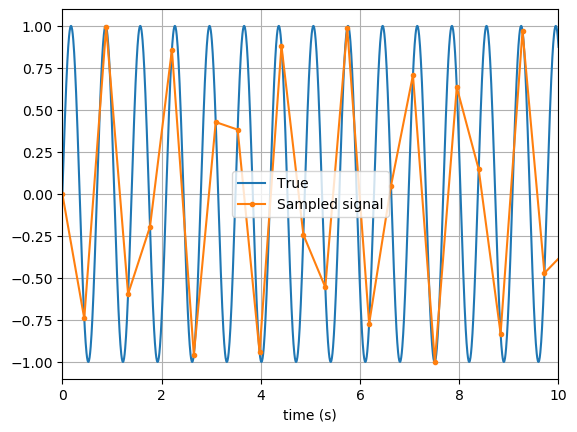

In [4]:
# to understand what we see, we can overlay a "true" oversampled signal 
# and limit ourselves to the first 10 seconds
t_oversampled = np.linspace(0,18.*np.pi,10000) 
true_signal = np.sin(9 * t_oversampled)
plt.plot(t_oversampled, true_signal, label='True')
plt.plot(t,signal,marker='o',markersize=3., label='Sampled signal')
plt.legend()
plt.xlabel('time (s)')
plt.xlim(0,10)
plt.grid(True)

In [5]:
# Now, let's try to make the FFT of the sampled signal 
tf = fft(signal)
freq = fftfreq(len(t),t[1]-t[0])
# let's see what "freq" looks like
freq

array([ 0.        ,  0.01768388,  0.03536777,  0.05305165,  0.07073553,
        0.08841941,  0.1061033 ,  0.12378718,  0.14147106,  0.15915494,
        0.17683883,  0.19452271,  0.21220659,  0.22989047,  0.24757436,
        0.26525824,  0.28294212,  0.300626  ,  0.31830989,  0.33599377,
        0.35367765,  0.37136153,  0.38904542,  0.4067293 ,  0.42441318,
        0.44209706,  0.45978095,  0.47746483,  0.49514871,  0.51283259,
        0.53051648,  0.54820036,  0.56588424,  0.58356812,  0.60125201,
        0.61893589,  0.63661977,  0.65430365,  0.67198754,  0.68967142,
        0.7073553 ,  0.72503919,  0.74272307,  0.76040695,  0.77809083,
        0.79577472,  0.8134586 ,  0.83114248,  0.84882636,  0.86651025,
        0.88419413,  0.90187801,  0.91956189,  0.93724578,  0.95492966,
        0.97261354,  0.99029742,  1.00798131,  1.02566519,  1.04334907,
        1.06103295,  1.07871684,  1.09640072,  1.1140846 , -1.13176848,
       -1.1140846 , -1.09640072, -1.07871684, -1.06103295, -1.04

That way to save the frequencies in an array is not super convenient. You ideally would like to "shift" the array to start from -xx and end at +xx. This is done with the command `fftshift`. But before looking at fftshift, we need to understand what are the units of those frequencies". 

In [6]:
np.fft.fftfreq?

Signature: np.fft.fftfreq(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 , ..., -3.75, -2.5 , -1

In [7]:
n = len(signal)
d = t[1]-t[0] 
print (d, n)

0.44178646691106466 128


In our case, we have a length n and a sample spacing d = 
this means that the maximum frequency will be (n/2 - 1) / (d * n)  

In [8]:
# now we can look at fft shifts
np.fft.fftshift?

Signature: np.fft.fftshift(x, axes=None)
Docstring:
Shift the zero-frequency component to the center of the spectrum.

This function swaps half-spaces for all axes listed (defaults to all).
Note that ``y[0]`` is the Nyquist component only if ``len(x)`` is even.

Parameters
----------
x : array_like
    Input array.
axes : int or shape tuple, optional
    Axes over which to shift.  Default is None, which shifts all axes.

Returns
-------
y : ndarray
    The shifted array.

See Also
--------
ifftshift : The inverse of `fftshift`.

Examples
--------
>>> freqs = np.fft.fftfreq(10, 0.1)
>>> freqs
array([ 0.,  1.,  2., ..., -3., -2., -1.])
>>> np.fft.fftshift(freqs)
array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

Shift the zero-frequency component only along the second axis:

>>> freqs = np.fft.fftfreq(9, d=1./9).reshape(3, 3)
>>> freqs
array([[ 0.,  1.,  2.],
       [ 3.,  4., -4.],
       [-3., -2., -1.]])
>>> np.fft.fftshift(freqs, axes=(1,))
array([[ 2.,  0.,  1.],
       [-4.

(-2, 2)

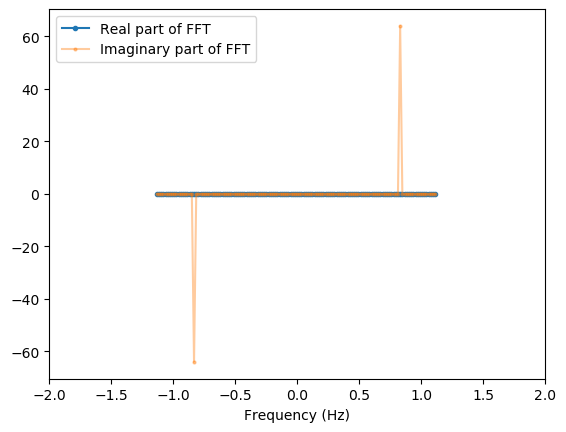

In [9]:

plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf.real),marker='o',markersize=3., label='Real part of FFT') 
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf.imag),marker='o',markersize=2., label='Imaginary part of FFT', alpha=0.4)
plt.legend()  
plt.xlabel('Frequency (Hz)')
plt.xlim(-2,2)
#if not shiftted back to [-xx, xx] (natural: 0,..,xx,-xx, almost0), there is a constant line between -xx and xx

Text(0, 0.5, 'PSD [V**2/Hz]')

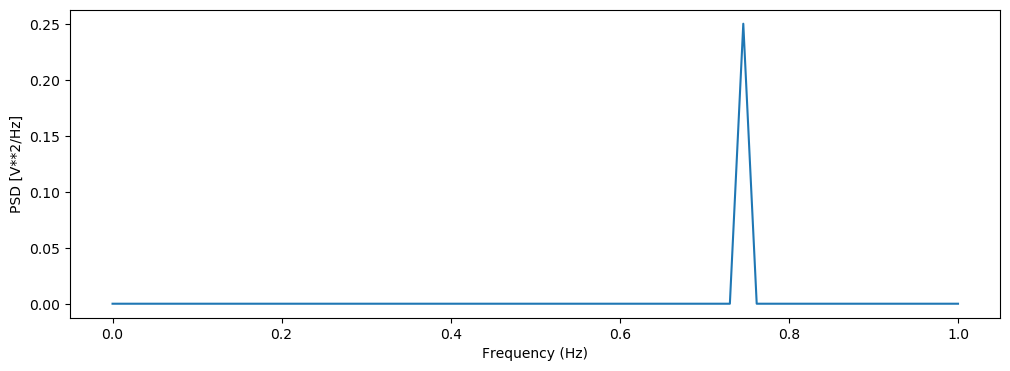

In [10]:
# You can also calculate the power spectral density (PSD) and express frequencies in Hz
# This is more convenient to find the Frequency of the signal 
N = len(tf)
sampling_frequency = 1. / np.mean(np.diff(t))   # = t[1]-t[0]
tf_trans = tf[0:N//2] / N
fr = np.linspace(0,sampling_frequency//2,N//2)

plt.figure(figsize=(12, 4))
plt.plot(fr, abs(tf_trans)**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD [V**2/Hz]')

In [11]:
print('Frequency of the signal:%.3f Hz'%fr[np.argmax(abs(tf_trans)**2)])

Frequency of the signal:0.746 Hz


Do you understand why it is not exactly 1.43 Hz as the input frequency? 

In [12]:
print('Sampling Frequency = %.2f' %sampling_frequency)

Sampling Frequency = 2.26


The input frequency is 1 / 0.698s = 1.43 Hz while our sampling frequency is in fact 2.26 Hz ... This is a too small frequency. You need to sample at least at twice the signal frequency, hence 2 * 1.43 Hz = 2.86 Hz. => You need to increase the number of sampling points! 

Number of points for Target frequency 10.00 : 565
Frequency of the signal (max of PSD):1.432 Hz
True Frequency: 1.432 Hz


Text(0, 0.5, 'PSD [V**2/Hz]')

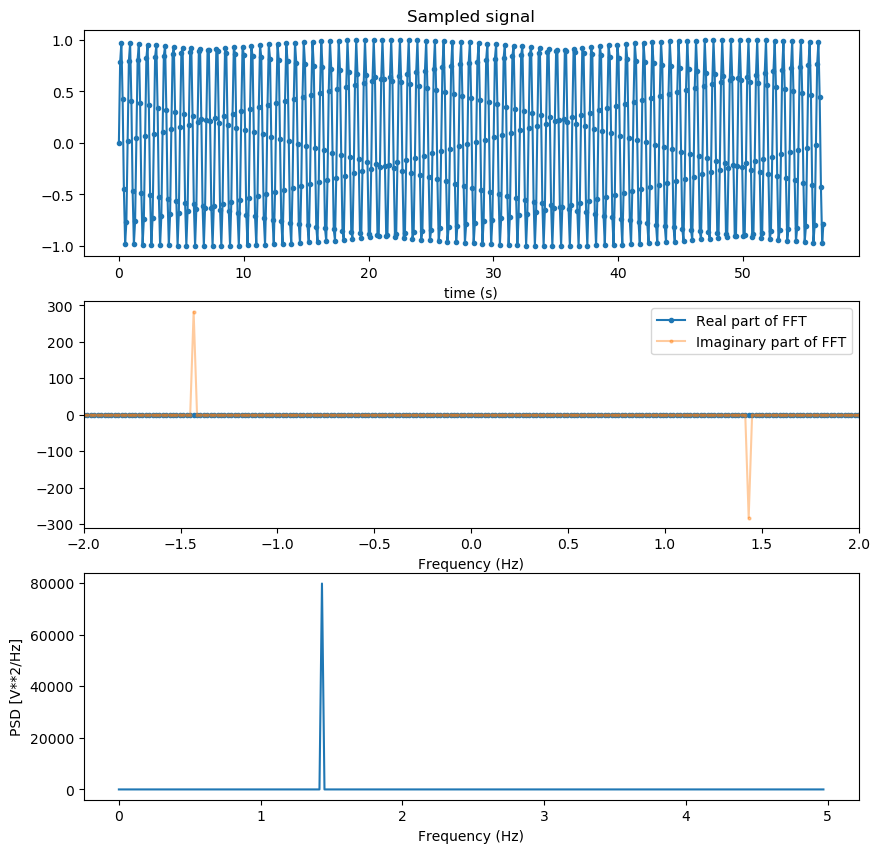

In [13]:
# let's now use a target frequency >= 2.86 
# Do not hesitate to experiment changing fs close to the sampling frequency
fs = 10 # 10 Hz  ; Target sampling frequency 
npts = int(np.round(18 * np.pi * fs))
t = np.linspace(-0.0, 18*np.pi, npts, endpoint=False) 
# beware that because npts is found through rounding, it 
print('Number of points for Target frequency %.2f : %i'%(fs, npts))
signal = np.sin( 9 * t )

# Visualise the signal 
f, ax = plt.subplots(nrows=3, figsize=(10,10))
ax[0].plot(t,signal,marker='o',markersize=3.)
ax[0].set_xlabel('time (s)')
ax[0].set_title('Sampled signal')

# calculating the Fourier transform 
tf = fft(signal)
freq = fftfreq(len(t),t[1]-t[0])

ax[1].plot(np.fft.fftshift(freq), np.fft.fftshift(tf.real),marker='o',markersize=3., label='Real part of FFT') 
ax[1].plot(np.fft.fftshift(freq), np.fft.fftshift(tf.imag),marker='o',markersize=2., label='Imaginary part of FFT', alpha=0.4)
ax[1].legend()  
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xlim(-2,2)

# Simple way to find the peak frequency of the FFT
N = len(tf)
PSD = abs(tf)**2
print('Frequency of the signal (max of PSD):%.3f Hz'%freq[np.argmax(PSD[0:len(freq)//2])])
print('True Frequency: %.3f Hz'%(9./(2*np.pi)))

# plotting the PSD
ax[2].plot(freq[0:len(freq)//2], PSD[0:len(freq)//2 ])
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('PSD [V**2/Hz]')



(0, 10)

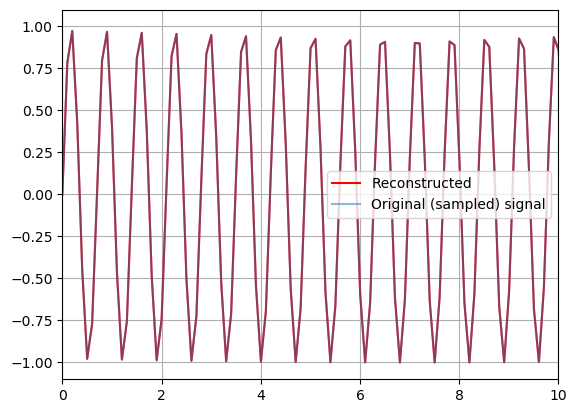

In [14]:
# Finally We can also reconstruct a signal using inverse Fourier Transform (ifft)
signal_ifft = np.fft.ifft(tf)
plt.plot(t, signal_ifft.real, label="Reconstructed", color='r')
plt.plot(t, signal, label='Original (sampled) signal', alpha=0.5)
plt.legend()
plt.grid(True)
plt.xlim(0,10)

Before reading further, experiment using the argument `endpoint=True` when generating the signal. What happens? 

In [15]:
# You can experiment here using `endpoint=True`

The argument `endpoint=False` is used when generating the time array to ensure that the last value in the array is excluded. Note that an alternative is to use the `np.arange()` function. 

Here's why it's important in this context:

#### 1. Avoid Overlap in Periodic Signals

The signal generation involves periodic sine waves (e.g., $\sin⁡(2 \pi\,f\,t)$. For these periodic functions:
- The starting point of one cycle ($t=0$) and the ending point ($t=18\pi$ in this case) are equivalent due to periodicity. ( $\sin(0) = np.sin(18 * np.pi * 9) = 0$
- Including the endpoint would create an extra sample that duplicates the starting point, which can result in an unwanted overlap or discontinuity when the signal is processed.

For example, if endpoint=True (the default), the time array will include both $0$ and $18\pi$:

``` python 
time = np.linspace(0, 18 * np.pi, 128, endpoint=True)
```

This means that the signal will have a redundant point at $t=18\pi$, creating a duplicate of the t=0 value for periodic functions like sine waves.

By setting endpoint=False, the time array excludes the endpoint ($18\pi$), ensuring smooth transitions for periodic signals:

``` python 
time = np.linspace(0, 18 * np.pi, 128, endpoint=False)
```

#### 2. Avoid Issues with Discrete Fourier Transform

The Discrete Fourier Transform algorithm assumes a continuous and periodic signal. If the time array includes the endpoint, it can create an artificial discontinuity in the signal at the boundary (between $t=18\pi$ and the next assumed cycle starting at $t=0$). This discontinuity introduces unwanted artifacts in the frequency spectrum, such as spectral leakage. 
np.sin(0), np.sin(18 * np.pi * 9)

In [16]:
# To fix the ideas, you can compare the value of the simus at the start and end point 
# When you use np.linspace and `endpoint=False`, `endpoint=True``. 
# How would you proceed to generate the same time series with arange? 

### FT of a sinus with different time coverage

Let's now consider a time series between 0 and 18$\pi$ and sinus(9 * t)

last time element: 55.49442101875239


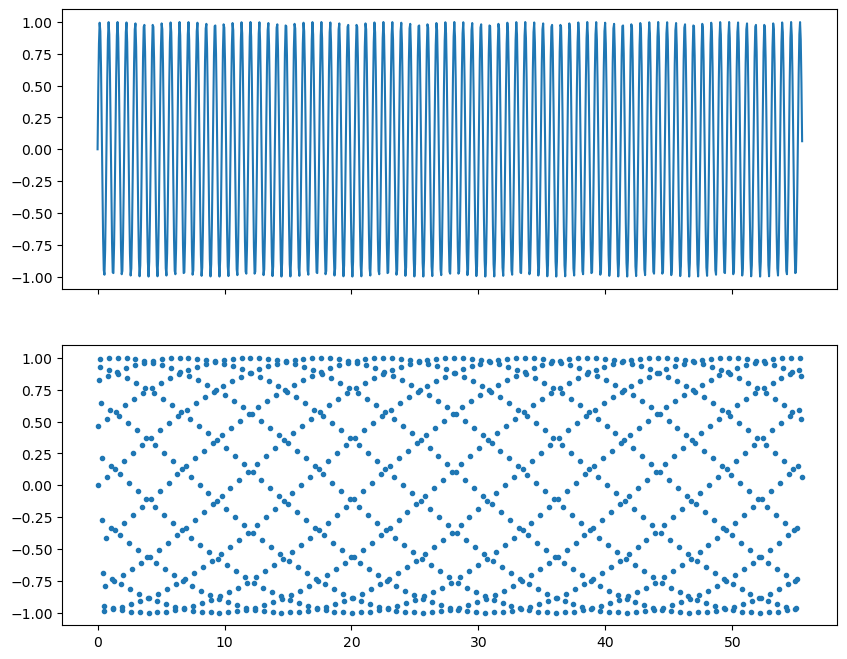

In [17]:
t = np.linspace(-0.0, 18 * np.pi - 1., 1024, endpoint=False) 
signal = np.sin(9 * t )
print('last time element:', t[-1])
# let's visualise the signal 
f, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True)
ax[0].plot(t,signal, label='solid lines')
ax[1].plot(t,signal,marker='o', ls='', markersize=3., label='Data points only')

Text(0.5, 0, 'Frequency (Hz)')

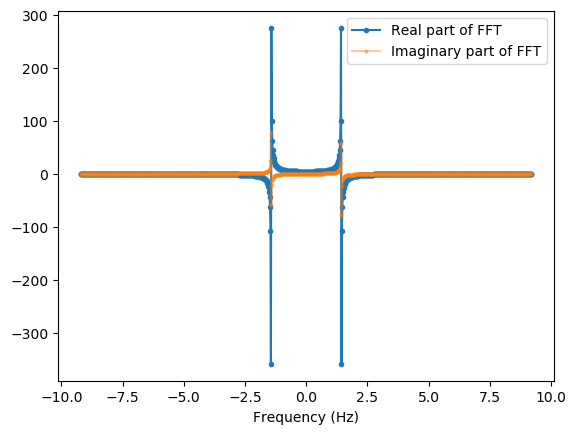

In [18]:
tf = fft(signal)
freq = fftfreq(len(t),t[1]-t[0])
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf.real),marker='o',markersize=3., label='Real part of FFT') 
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf.imag),marker='o',markersize=2., label='Imaginary part of FFT', alpha=0.4)
plt.legend()  
plt.xlabel('Frequency (Hz)')

We see artifacts in the FFT. To avoid those, we need to roll the signal by half its length with the command np.roll(). The undertanding of the roll command (see help of roll) may not be so clear with this periodic signal. The next section discusses the FFT of a triangle. The role of `np.roll()` in that case will be clearer. 

In [19]:
np.roll?

Signature: np.roll(a, shift, axis=None)
Docstring:
Roll array elements along a given axis.

Elements that roll beyond the last position are re-introduced at
the first.

Parameters
----------
a : array_like
    Input array.
shift : int or tuple of ints
    The number of places by which elements are shifted.  If a tuple,
    then `axis` must be a tuple of the same size, and each of the
    given axes is shifted by the corresponding number.  If an int
    while `axis` is a tuple of ints, then the same value is used for
    all given axes.
axis : int or tuple of ints, optional
    Axis or axes along which elements are shifted.  By default, the
    array is flattened before shifting, after which the original
    shape is restored.

Returns
-------
res : ndarray
    Output array, with the same shape as `a`.

See Also
--------
rollaxis : Roll the specified axis backwards, until it lies in a
           given position.

Notes
-----
.. versionadded:: 1.12.0

Supports rolling over multiple dimens

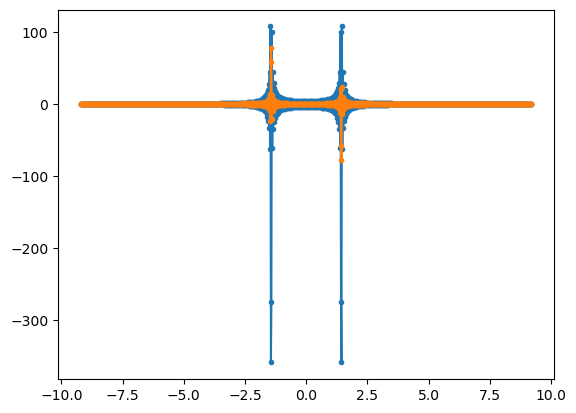

In [20]:
# Makeing the TF with a rolled signal 
tf = fft(np.roll(signal,int(signal.size/2)))
freq = fftfreq(len(t),t[1]-t[0])
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf.real),marker='o',markersize=3.) 
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf.imag),marker='o',markersize=3.) 

## TF of a triangular-shaped signal 

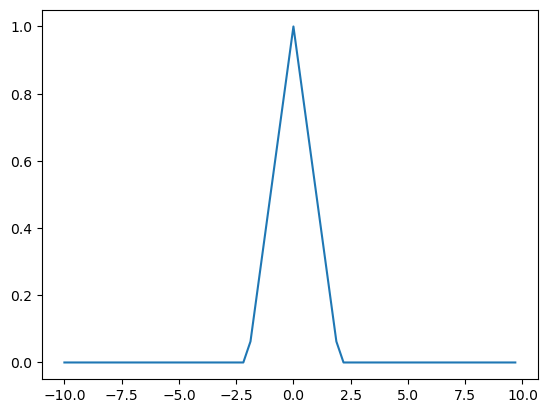

In [21]:
t = np.linspace(-10,10,64,endpoint=False)
signal = np.zeros_like(t)
b=2.
for i,ti in enumerate(t):
    if ti>-b and ti<= 0.:
        signal[i] = ti / b + 1
    elif ti>0. and ti<b:
        signal[i] = - ti / b +1

# let's plot that signal
plt.plot(t,signal)

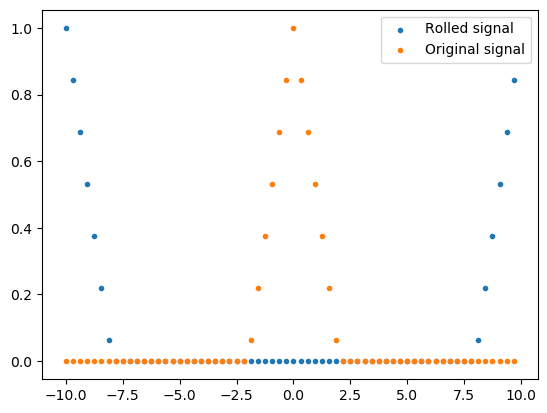

In [22]:
# We need to roll the signal before making the fft
tf = fft(np.roll(signal,int(signal.size/2)))#,norm='forward')
freq = fftfreq(len(t),t[1]-t[0])
# let's visualise the signal 
plt.scatter(t, np.roll(signal,int(signal.size/2)), marker='.',  label='Rolled signal')
plt.scatter(t, signal, marker='.',  label='Original signal')

plt.legend()

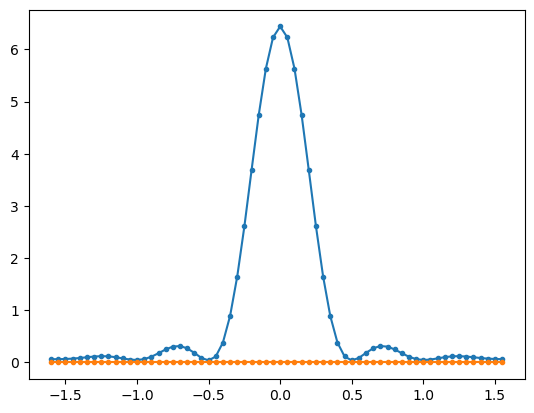

In [23]:
plt.plot(np.fft.fftshift(freq), np.abs(np.fft.fftshift(tf)),marker='o',markersize=3.) 
plt.plot(np.fft.fftshift(freq), (np.fft.fftshift(tf.imag)),marker='o',markersize=3.) 

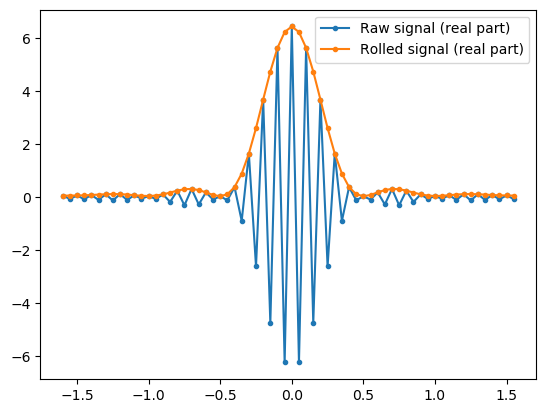

In [24]:
tf_raw = fft(signal)#,norm='forward')
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf_raw.real),marker='o',markersize=3., label='Raw signal (real part)') 
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(tf.real),marker='o',markersize=3., label='Rolled signal (real part)')  
plt.legend()

### Exercise: Filtering a multi-frequency signal with a FFT

Write a Python code that:

* Generates a periodic "sinusoidal" signal between 0 and 2s and containing a mix of low- and high-frequency components (at 5 and 50 Hz).
* Applies the Fourier Transform to the signal to analyze its frequency spectrum.
* Removes the low-frequency components using a frequency-domain filter.
* Reconstructs the filtered signal using the Inverse Fourier Transform.
* Visualizes the original signal, its frequency spectrum, and the filtered signal.

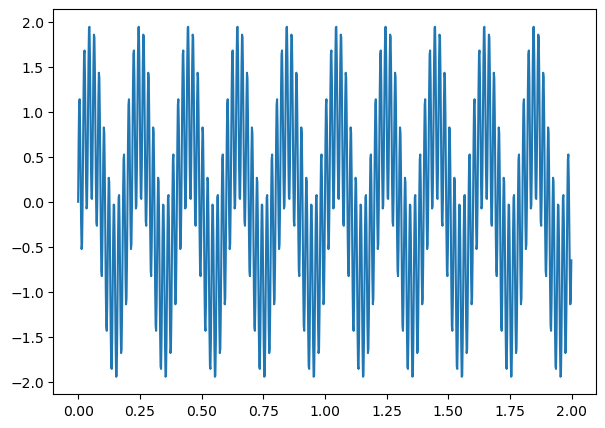

In [25]:
# 1. Generate a signal
# Create a time array (e.g., 0 to 2 seconds with 1000 samples)
time = np.linspace(0, 2, 1000, endpoint=False)
# Create a signal composed of low and high frequencies (e.g., 5 Hz and 50 Hz)
low_freq = np.sin(2 * np.pi * 5 * time)  # Low-frequency component
high_freq = np.sin(2 * np.pi * 50 * time)  # High-frequency component
signal = low_freq + high_freq
# Visualise the signal generated
f, ax = plt.subplots(figsize=(7,5))
ax.plot(time, signal)

/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


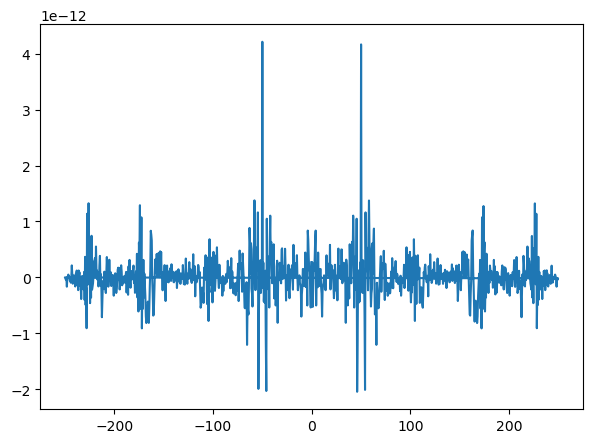

In [26]:
# 2. Apply the Fourier Transform
fft_signal = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=time[1] - time[0])  # Frequency axis
# Visualise the FFT
f, ax = plt.subplots(figsize=(7,5))
ax.plot(frequencies, fft_signal)


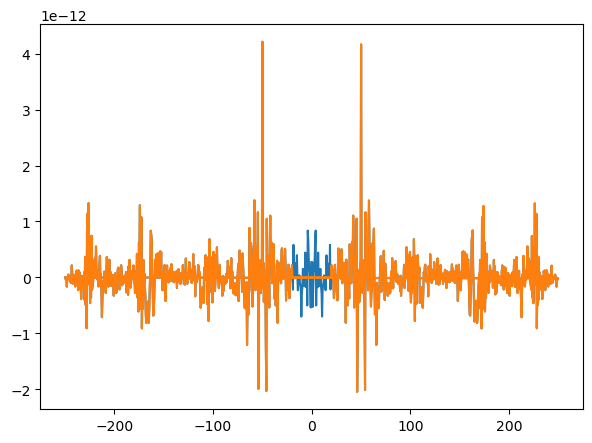

In [27]:
# 3. Filter the low frequencies using a simple cut-off
# Define a cutoff frequency (e.g., 20 Hz) to remove low frequencies
cutoff = 20
fft_signal_filtered = fft_signal.copy()
fft_signal_filtered[np.abs(frequencies) < cutoff] = 0
# Visualise the orginal and filtered FFT
f, ax = plt.subplots(figsize=(7,5))
ax.plot(frequencies, fft_signal, label='Original Signal')
ax.plot(frequencies, fft_signal_filtered, label='Filtered Signal')


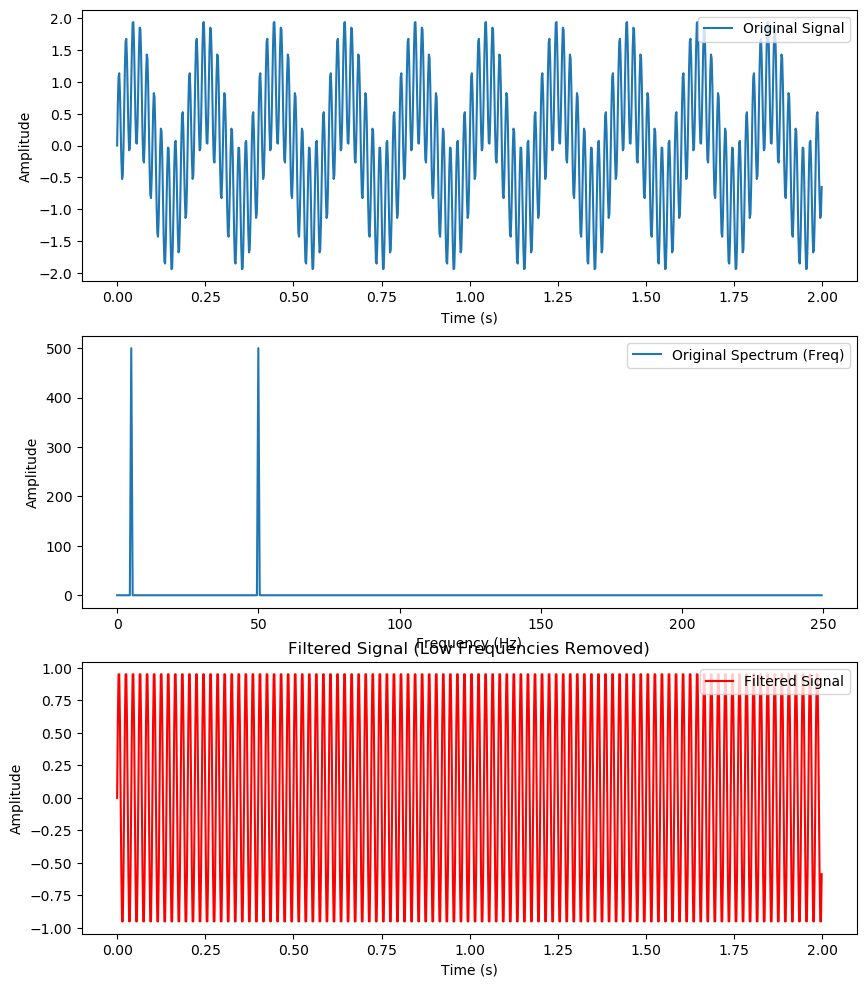

In [28]:
# 4. Reconstruct the signal using Inverse Fourier Transform
filtered_signal = np.fft.ifft(fft_signal_filtered)

# 5. Visualize the results
f, ax = plt.subplots(figsize=(10, 12), nrows=3)
# Plot Original signal
ax[0].plot(time, signal, label="Original Signal")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()

# Plot Frequency spectrum

ax[1].plot(frequencies[:len(frequencies)//2],
            np.abs(fft_signal)[:len(frequencies)//2], 
            label="Original Spectrum (Freq)")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()

# Plot Filtered signal
ax[2].plot(time, filtered_signal.real, label="Filtered Signal", color='r')
ax[2].set_title("Filtered Signal (Low Frequencies Removed)")
ax[2].set_xlabel("Time (s)")
ax[2].set_ylabel("Amplitude")
ax[2].legend()

#plt.show()
